In [148]:
import os
if 'notebooks' in os.getcwd():
    os.chdir("..")

import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from statistics import mean

from src.mapping import get_movies_id_map

## Exploratory Data Analysis (EDA)

### Goals
* Identify missing values
* Study the distribution of ratings
* Study how many users have submitted reviews

In [2]:
ratings_df = pd.read_csv(
    "data/user_ratedmovies.dat", 
    sep='\t'
)

In [82]:
movies = pd.read_csv(
    "data/movies.dat", 
    sep='\t',
    encoding='latin1'
)

In [87]:
movies_id_map= get_movies_id_map()

In [3]:
ratings_df

,userID,movieID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second
0,75,3,1.0,29,10,2006,23,17,16
1,75,32,4.5,29,10,2006,23,23,44
2,75,110,4.0,29,10,2006,23,30,8
3,75,160,2.0,29,10,2006,23,16,52
4,75,163,4.0,29,10,2006,23,29,30
...,...,...,...,...,...,...,...,...,...
855593,71534,44555,4.0,3,12,2007,3,5,38
855594,71534,46578,4.0,3,12,2007,2,56,44
855595,71534,48516,4.5,3,12,2007,2,53,46
855596,71534,61075,5.0,10,10,2008,9,56,5


In [44]:
ratings_df.isna().sum()

userID         0
movieID        0
rating         0
date_day       0
date_month     0
date_year      0
date_hour      0
date_minute    0
date_second    0
dtype: int64

### Analysing time dependency

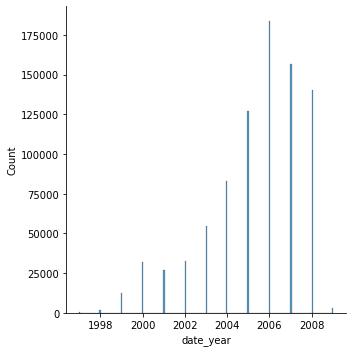

In [46]:
sns.displot(
    ratings_df,
    x ='date_year',    
)

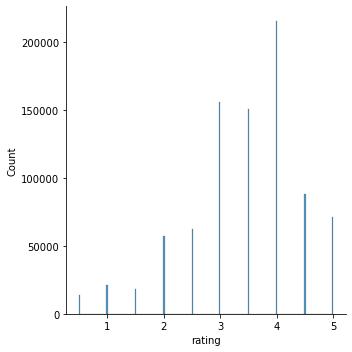

In [66]:
sns.displot(
    ratings_df,
    x = 'rating',
    palette = 'tab10'
)

### Analysing number of reviews per user

In [38]:
reviews_per_user = ratings_df\
    .groupby('userID')\
    .count()

Text(3.674999999999997, 0.5, 'number of users')

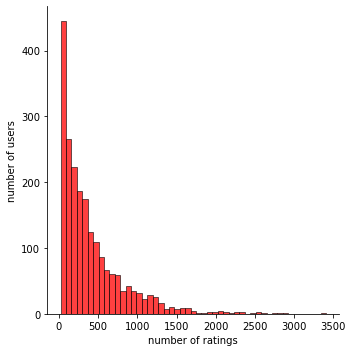

In [67]:
sns.displot(reviews_per_user, x='rating', color = 'red')
plt.xlabel("number of ratings")
plt.ylabel("number of users")

In [42]:
reviews_per_user.rating.mean(), \
reviews_per_user.rating.median(), \
reviews_per_user.rating.min(), \
reviews_per_user.rating.max()

(404.92096545196404, 273.0, 20, 3410)

* In average, every user has submitted 405 reviews 
* 50% of users have submitted at least 273 reviews
* Every user has submitted $ 20 \leq n \leq 3410  $ reviews

### Analysing number of reviews per movie

In [69]:
reviews_per_movie = ratings_df\
    .groupby("movieID")\
    .count()

(0.0, 600.0)

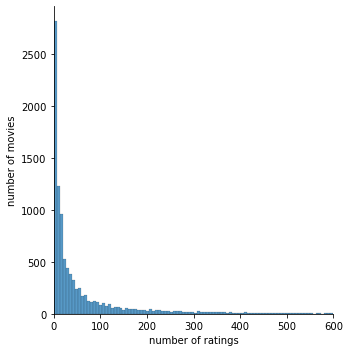

In [37]:
sns.displot(reviews_per_movie, x = 'rating')
plt.xlabel("number of ratings")
plt.ylabel("number of movies")
plt.xlim([0, 600])

In [70]:
reviews_per_movie.rating.mean(), \
reviews_per_movie.rating.median(), \
reviews_per_movie.rating.min(), \
reviews_per_movie.rating.max()

(84.63725393213967, 21.0, 1, 1670)

* In average, each movie has 85 reviews 
* 50% of movies have at least 21 reviews
* Each movie has $ 1 \leq n \leq 1670$ reviews

### Favorite movies

In [74]:
movies_with_reviews = reviews_per_movie\
    .rating > 20

In [95]:
avg_reviews_per_movie

movieID
Toy story                      3.735154
Jumanji                        2.976471
Grumpy Old Men                 2.873016
Waiting to Exhale              2.577778
Father of the Bride Part II    2.753333
                                 ...   
Bedtime Stories                3.500000
Manhattan Melodrama            4.000000
Choke                          3.250000
Revolutionary Road             2.500000
Blackadder Back & Forth        4.000000
Name: rating, Length: 10109, dtype: float64

In [115]:
avg_reviews_per_movie = ratings_df.groupby("movieID")\
    .mean()\
    .rating[movies_with_reviews]

In [116]:
avg_reviews_per_movie.index = avg_reviews_per_movie\
    .index

In [180]:
best_movies = avg_reviews_per_movie\
    .sort_values()\
    .tail(3)\
    .index

In [181]:
worst_movies  = avg_reviews_per_movie\
    .sort_values()\
    .head(3)\
    .index

In [182]:
best_movies, worst_movies

(Int64Index([2351, 858, 318], dtype='int64', name='movieID'),
 Int64Index([1495, 6483, 4775], dtype='int64', name='movieID'))

In [170]:
pd.Index.union(best_movies, worst_movies)

Int64Index([1495, 6483, 4775], dtype='int64', name='movieID')

In [183]:
best_worst_movies = pd\
    .Index\
    .union(best_movies, worst_movies)

In [184]:
best_worst_movies_mask = ratings_df['movieID'].isin(best_worst_movies)

In [185]:
best_worst_movies_df = ratings_df[best_worst_movies_mask]
best_worst_movies_df['movie_name'] = best_worst_movies_df\
    .movieID\
    .map(movies_id_map)

C:\Users\User\AppData\Local\Temp\ipykernel_2512\2408537021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_worst_movies_df['movie_name'] = best_worst_movies_df\


Text(0.5, 1.0, '3 best rated and 3 worst rated movies')

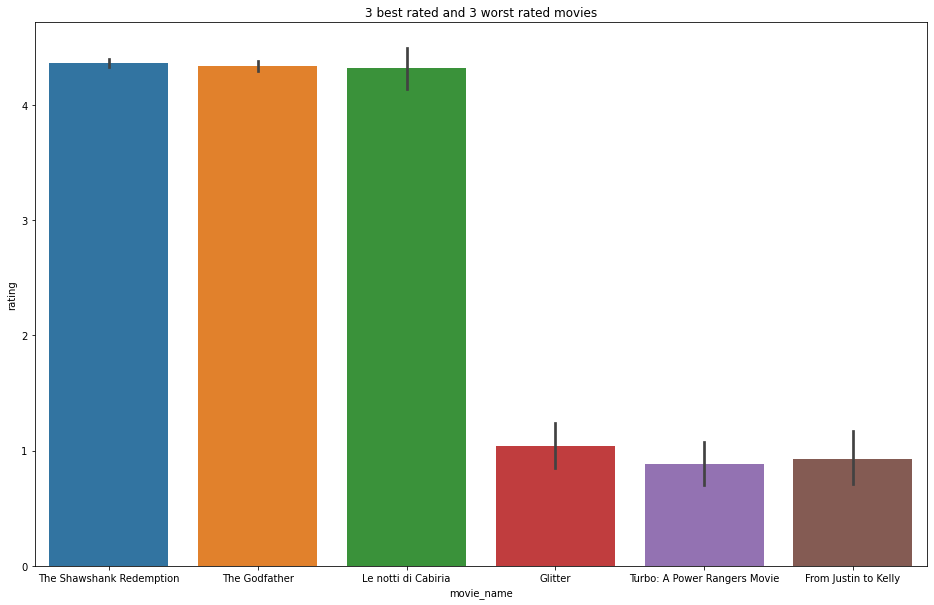

In [188]:

plt.figure(figsize = [16,10])
sns.barplot(
    data = best_worst_movies_df,
    x = 'movie_name',
    y='rating',
    estimator = mean
)
plt.title("3 best rated and 3 worst rated movies")

In [11]:
ratings_df['movieID'].nunique(),\
ratings_df['userID'].nunique()

(10109, 2113)